<a href="https://colab.research.google.com/github/danielamejiacastro/MLDS--Course/blob/main/M1U5_fase_4_Analisis_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

# **Análisis de datos**
---

Este notebook es una plantilla que le puede servir como guía para el cuarto entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. ---**INGRESE SU RESPUESTA**---
2. ---**INGRESE SU RESPUESTA**---
3. ---**INGRESE SU RESPUESTA**---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
def identificar_dtypes(df):
  '''
  Esta función detecta las variables consideradas como categoricas y cuantitativas en este set especifico
  La función retorna dos listas, cada una agrupando las variables del dataframe
  La función solo identifica las variables categoricas para este tipo de dataset en el cual solo tienen dos valores: [0,1]
  '''
  variables_categoricas=[]
  variables_cuantitativas=[]
  for col in df.columns:
    if set(df[col].unique())==set([0,1]):
      variables_categoricas.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
      variables_cuantitativas.append(col)
    else:
      print(f'La variable {col} no ha sido identificada')
  return variables_categoricas,variables_cuantitativas
v_cat,v_cuan=identificar_dtypes(df)

## **1. Análisis y resultados**
---

Al adentrarse en el análisis de datos, es crucial adoptar un enfoque estratégico que responda a las preguntas de planteadas en el proyecto. La selección de variables para estudio requiere una evaluación cuidadosa de los objetivos específicos del proyecto, priorizando aquellas que se consideren fundamentales para obtener resultados significativos.

A lo largo de esta entrega, trate busque responder las siguientes preguntas

- ¿Cómo se aplicaron conceptos específicos de estadística descriptiva e inferencial en el análisis de datos y cuál fue el enfoque utilizado para interpretar los resultados de manera precisa?
- ¿Cómo se interpretaron los resultados de la estadística descriptiva y qué conclusiones se pueden extraer?
- ¿Cómo se relacionan los resultados del análisis de datos con los objetivos y preguntas planteadas inicialmente?
- ¿Qué implicaciones prácticas tienen los hallazgos y cómo podrían influir en la toma de decisiones?

In [ ]:
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
45,50.0,0,582,1,38,0,310000.0,1.9,135,1,1,35,1
42,70.0,0,571,1,45,1,185000.0,1.2,139,1,1,33,1
282,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250,0
201,45.0,0,308,1,60,1,377000.0,1.0,136,1,0,186,0
277,70.0,0,582,1,38,0,25100.0,1.1,140,1,0,246,0


### **1.1. Análisis de correlaciones**
---

- Analice la posible existencia de relaciones entre las variables, utilizando medidas de correlación o visualizaciones pertinentes.
- Detecte la presencia de redundancias entre las variables, con el objetivo de facilitar su posterior eliminación o selección en el análisis.
- ¿Cuáles fueron las variables seleccionadas para el análisis de correlaciones, y cómo se eligieron en función de los objetivos del proyecto?


In [ ]:
#Pruebas de normalidad (para definir el coeficiente de correlación más adecuado)
v_normales=[]
v_no_normales=[]
for col in v_cuan:
  if stats.shapiro(df[col]).pvalue < 0.05:
    v_no_normales.append(col)
    print(f'La variable {col} NO es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')
  else:
    v_normales.append(col)
    print(f'La variable {col} SI es normal con un pvalor de {stats.shapiro(df[col]).pvalue}')

La variable age NO es normal con un pvalor de 5.3476593166124076e-05
La variable creatinine_phosphokinase NO es normal con un pvalor de 7.05055700731454e-28
La variable ejection_fraction NO es normal con un pvalor de 7.215172015406779e-09
La variable platelets NO es normal con un pvalor de 2.8836867789483467e-12
La variable serum_creatinine NO es normal con un pvalor de 5.3927583038658e-27
La variable serum_sodium NO es normal con un pvalor de 9.220169072676754e-10
La variable time NO es normal con un pvalor de 6.284944120693581e-09


Como ninguna variable sigue una distribución normal, se recomienda implementar el coeficiente de correlación de Spearman $\rho$ entre estas variables

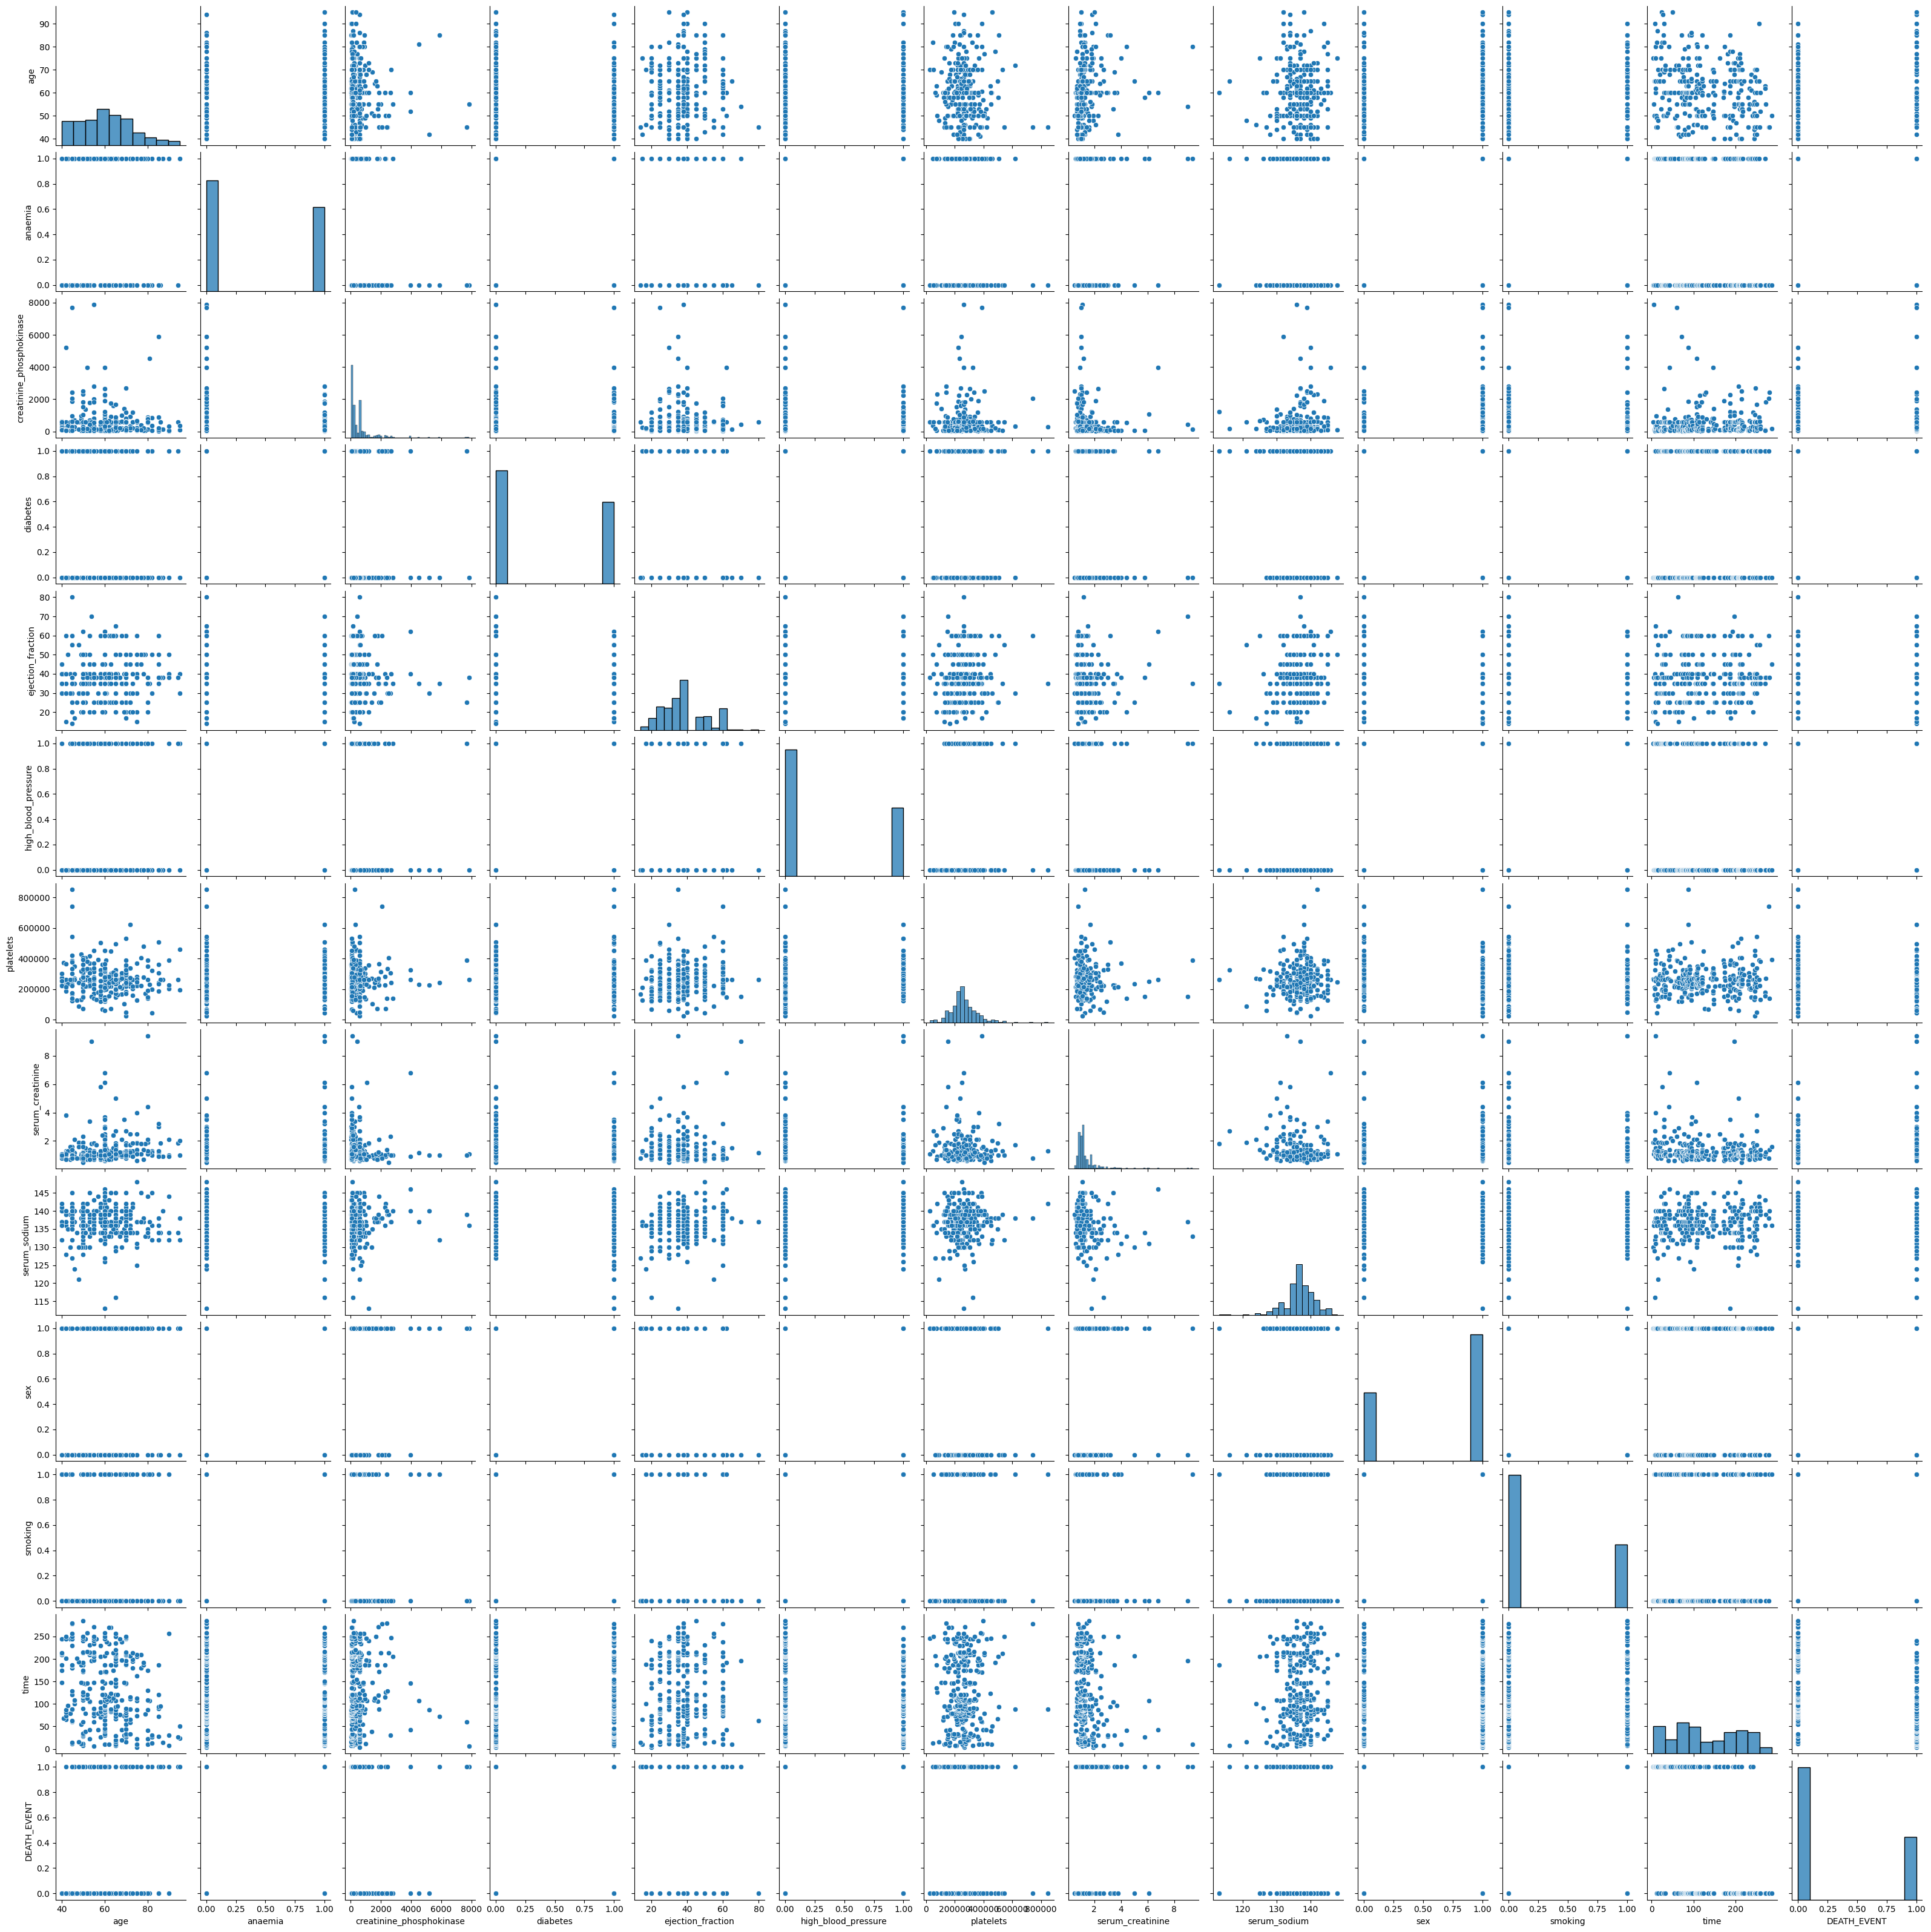

In [ ]:
#Variables cuantitativas relación
sns.pairplot(df)

<Axes: >

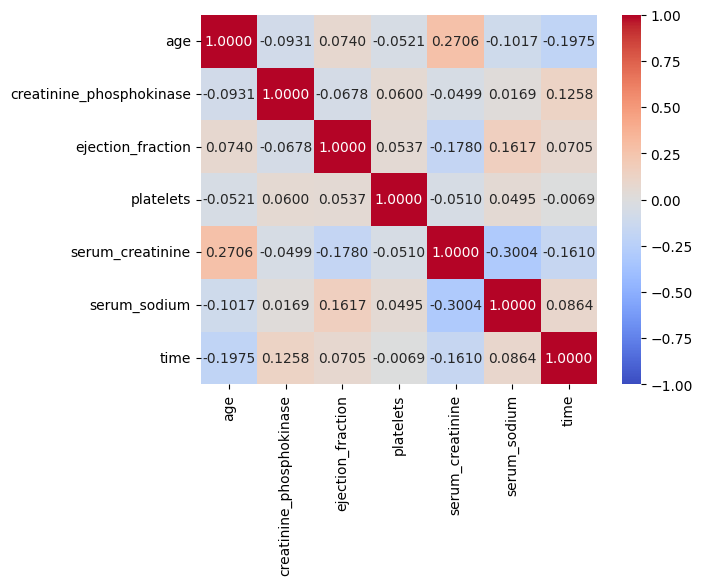

In [ ]:
# Variables cuantitativas correlación
sns.heatmap(df[v_cuan].corr(method='spearman'),cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f')

**Correlación entre variables binarias y continuas (Punto biserial)**

In [ ]:
from scipy.stats import pointbiserialr

In [ ]:
#Encontrar correlaciones y pvalores
p_values=np.zeros([len(v_cat),len(v_cuan)])
coef_corr_biserial=np.zeros([len(v_cat),len(v_cuan)])
for i,col_cat in enumerate(v_cat):
  for j,col_cuan in enumerate(v_cuan):
    coef_corr_biserial_num, p_value = pointbiserialr(df[col_cat], df[col_cuan])
    coef_corr_biserial[i][j]=coef_corr_biserial_num
    p_values[i][j]=p_value
df_pvalues=pd.DataFrame(p_values,index=v_cat,columns=v_cuan)
correlaciones_biserial=pd.DataFrame(coef_corr_biserial,index=v_cat,columns=v_cuan)

Text(0.5, 80.5815972222222, 'Variables Cuantitativas')

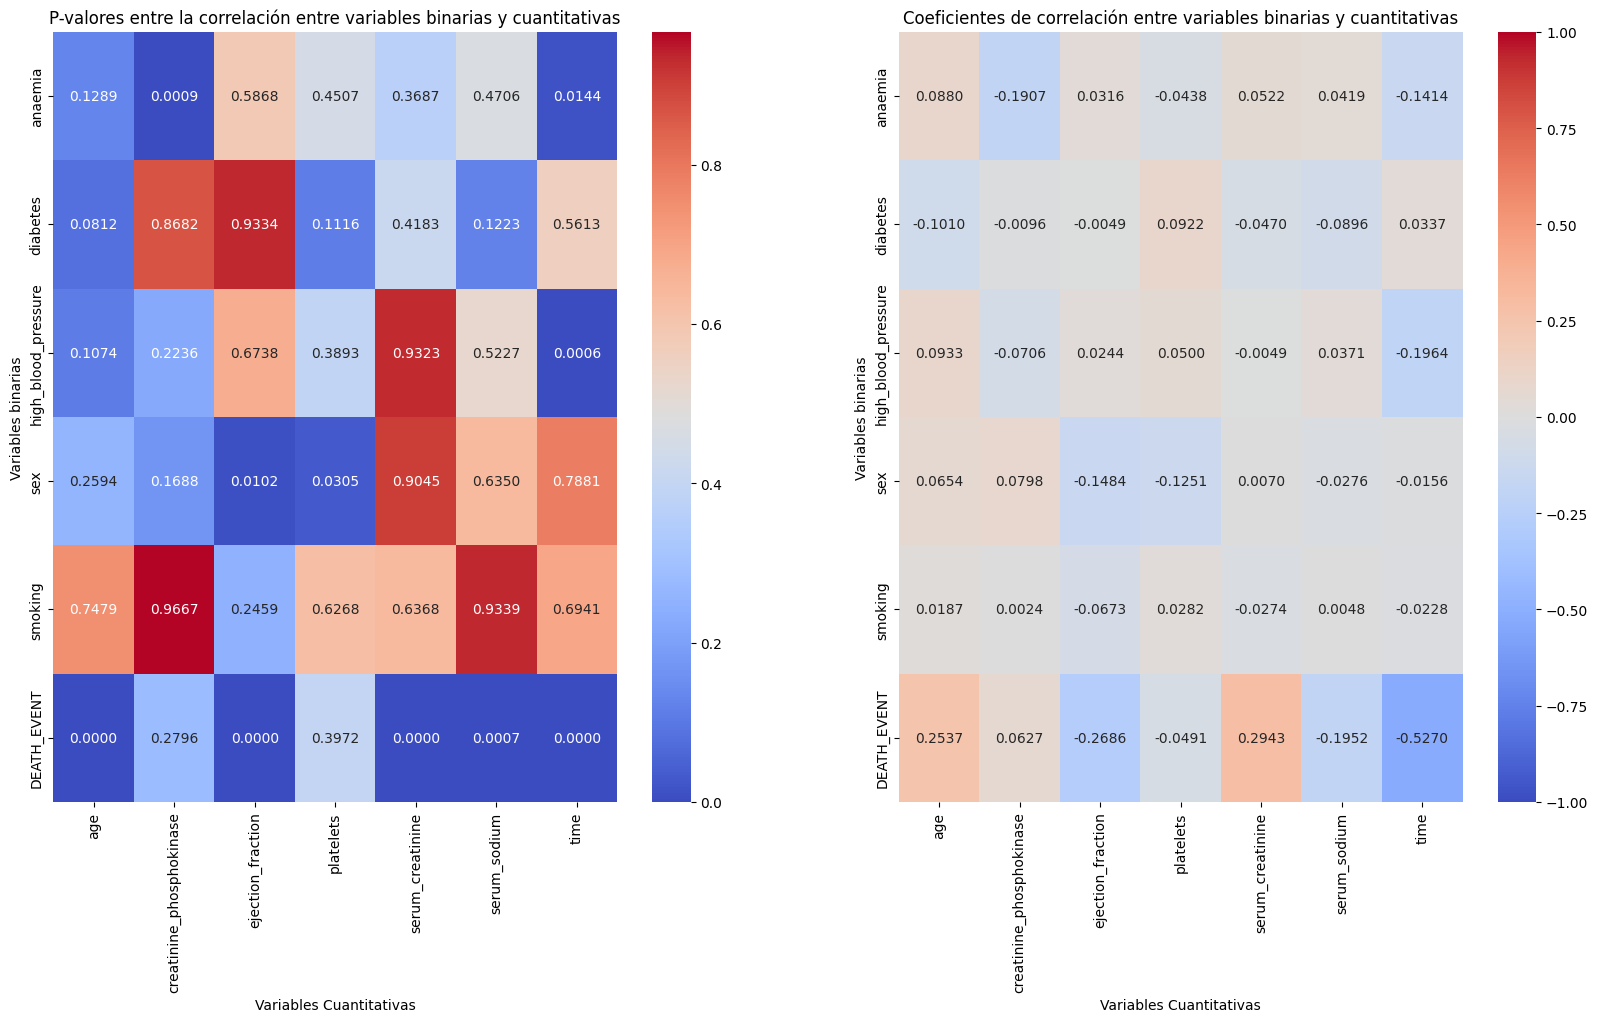

In [ ]:
#Graficar correlaciones y pvalores
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

sns.heatmap(df_pvalues,cmap='coolwarm',vmin=0, annot=True,fmt='.4f',ax=ax[0])
ax[0].set_title('P-valores entre la correlación entre variables binarias y cuantitativas')
ax[0].set_ylabel('Variables binarias')
ax[0].set_xlabel('Variables Cuantitativas')

sns.heatmap(correlaciones_biserial,cmap='coolwarm',vmin=-1,vmax=1, annot=True,fmt='.4f',ax=ax[1])
ax[1].set_title('Coeficientes de correlación entre variables binarias y cuantitativas')
ax[1].set_ylabel('Variables binarias')
ax[1].set_xlabel('Variables Cuantitativas')

***Aunque tenemos coeficientes de correlación muy bajos y poco evidentes en las graficas pairplot, sugiero que hagamos el modelo y tratemos de depurar los datos para serum_creatininte, age y ejection fraction (las cuales se estudiaban en el paper y que aqui muestran mejor correlación que las demas) Contra Death_event***

### **1.2. Análisis de regresiones**
---

- Apartir de las correlaciones identificadas, ¿es posible llevar a cabo un análisis de regresiones para estimar el valor de alguna de las variables de interés?
- ¿Cuáles fueron las variables seleccionadas para el análisis de regresiones y cómo se eligieron en función de los objetivos del proyecto?


In [ ]:
model = sm.GLM.from_formula("DEATH_EVENT ~ ejection_fraction + serum_creatinine + age", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -152.64
Date:                Wed, 13 Mar 2024   Deviance:                       305.28
Time:                        03:10:45   Pearson chi2:                     318.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2089
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3531      0.840     -2.803      0.005      -3.999      -0.708
ejection_fraction    -0.0700      0.014     -4.918      0.000      -0.098      -0.042
serum_creatinine      0.6659      0.159      4.184      0.000       0.354       0.978
age                   0.0517      0.012      4.202      0.000       0.028       0.076
=====================================================================================
"""

## **¿El modelo genera una buena predicción?**
---

Los resultados de la visualización del punto anterior nos indican que, en algunos casos, el modelo es bastante acertado para clasificar flores de alguna de las dos especies. Vamos a evaluar la **exactitud (*accuracy*)** del modelo de regresión logística. Esta es una métrica de desempeño típica que se utiliza para evaluar los clasificadores. Se calcula de la siguiente manera:

$$Accuracy = \frac{número\ de\ aciertos}{total}$$


In [ ]:
#Aplicación del modelo en los datos
dfc=df.copy()
Intercept,x1,x2,x3=result.params
dfc['Prediction_model']=1/(1+np.exp(-(Intercept + dfc['ejection_fraction']*x1 + dfc['serum_creatinine']*x2 + dfc['age']*x3)))
dfc['Prediction_result']=dfc['Prediction_model'].apply(lambda x: 0.0 if x<=0.5 else 1.0)
#Aciertos del modelo
dfc['Acierto_modelo']= dfc['DEATH_EVENT'] == dfc['Prediction_result']
#Stats
porcentaje_acierto=dfc['Acierto_modelo'].sum()*100/len(dfc['Acierto_modelo'])
total=dfc['Acierto_modelo'].sum()
print(f'La exactitud del modelo en el dataset es de {porcentaje_acierto}%\nCon un total de {total} aciertos de 299')

La exactitud del modelo en el dataset es de 76.92307692307692%
Con un total de 230 aciertos de 299


## **2. Resultados y visualizaciones**

### **2.1. Visualizaciones Estáticas**
---

* Incluya gráficos y visualizaciones estáticas que sean relevantes para los datos analizados.
* Explique cada visualización y cómo contribuye a la comprensión de los resultados.

In [ ]:
# ---INGRESE SU CÓDIGO---

### **2.2. Visualizaciones Interactivas**
---

* Cree visualizaciones interactivas, como gráficos dinámicos o tableros interactivos y proporcione instrucciones claras sobre cómo interactuar con ellos.
* Explore cómo estas visualizaciones ayudan en la exploración de datos y documente su análisis.

In [ ]:
# ---INGRESE SU CÓDIGO---

### **2.3. Visualización de Mapas Coropléticos (Opcional)**
---

* Si aplica mapas coropléticos para representar datos geoespaciales, incluya estas visualizaciones.
* Explique la elección de este tipo de visualización y cómo ésta contribuye a la comprensión de patrones geográficos y a la solución planteada.

In [ ]:
# ---INGRESE SU CÓDIGO---

### **2.4. Interpretación de Resultados**
---
* ¿Existen patrones o tendencias significativas en los datos?
* ¿Qué significan los resultados en términos prácticos?
* ¿Existen patrones o tendencias inesperadas en los datos que requieran una consideración especial o una investigación adicional?
* ¿Cuáles fueron los hallazgos principales que contribuirán al proceso de toma de decisiones?

Recuerde que la interpretación de resultados es una fase clave para extraer el significado de los datos y proporcionar respuestas o soluciones al problema inicial.

In [ ]:
# ---INGRESE SU CÓDIGO---

## **3. Conclusiones**
---
Asegúrese de incluir al menos una conclusión de cada unidad tratada en los *notebooks*. Estas conclusiones actúan como resúmenes breves que destacan los puntos clave y los aprendizajes esenciales de cada sección.


1.   
2.   
3.   
4.   



## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*